In [2]:
import os
from utilities import preprocessDICOM
import numpy as np

In [5]:
path2dcm = '../imagedata/Esophagus_DICOM_211Pt/'
outputdir = '../imagedata/Eso_Numpy_ZeroCent64x64x64_211/' 

In [6]:
pathlist = []
RTstrfiles=[]
for x,_,_ in os.walk(path2dcm):
    pathlist.append(x)
pathlist.pop(0)
len(pathlist)

211

DoneFiles = []
NotDoneFiles = []
for k in range(len(pathlist)):
    path2Rtstr = []
    for i in os.listdir(pathlist[k]):
        if 'RS' in i:
            path2Rtstr.append(i)
    RTstrPath = os.path.join(pathlist[k],path2Rtstr[0])
    DICOMpath = pathlist[k]
    fname = outputdir + RTstrPath[-10:][:6] + '.npy'
    try:
        img = preprocessDICOM.preprocess(DICOMpath,RTstrPath,zero=False)
    except:
        print(f'Could not Convert -- {fname}')
        NotDoneFiles.append(fname)
    np.save(fname,img)
    print(f'{fname} Cropped Successfully')
    DoneFiles.append(fname)

In [7]:
#DynamicCrop.DynamicCrop(Path2ImgMsk='D:/ImageData/Esophagus_NIFTI_260194',
                        #outpath='D:/imagedata/Eso_Numpy_NoZeroCent_211',crop_fact=64,zero_centering=False)

# Check Problem patient

In [8]:
from utilities import utilities

In [9]:
IDs = []
for k in range(len(pathlist)):
    for i in os.listdir(pathlist[k]):
        if 'RS' in i:
            IDs.append(int(i[3:9]))

In [24]:
IDs.sort()

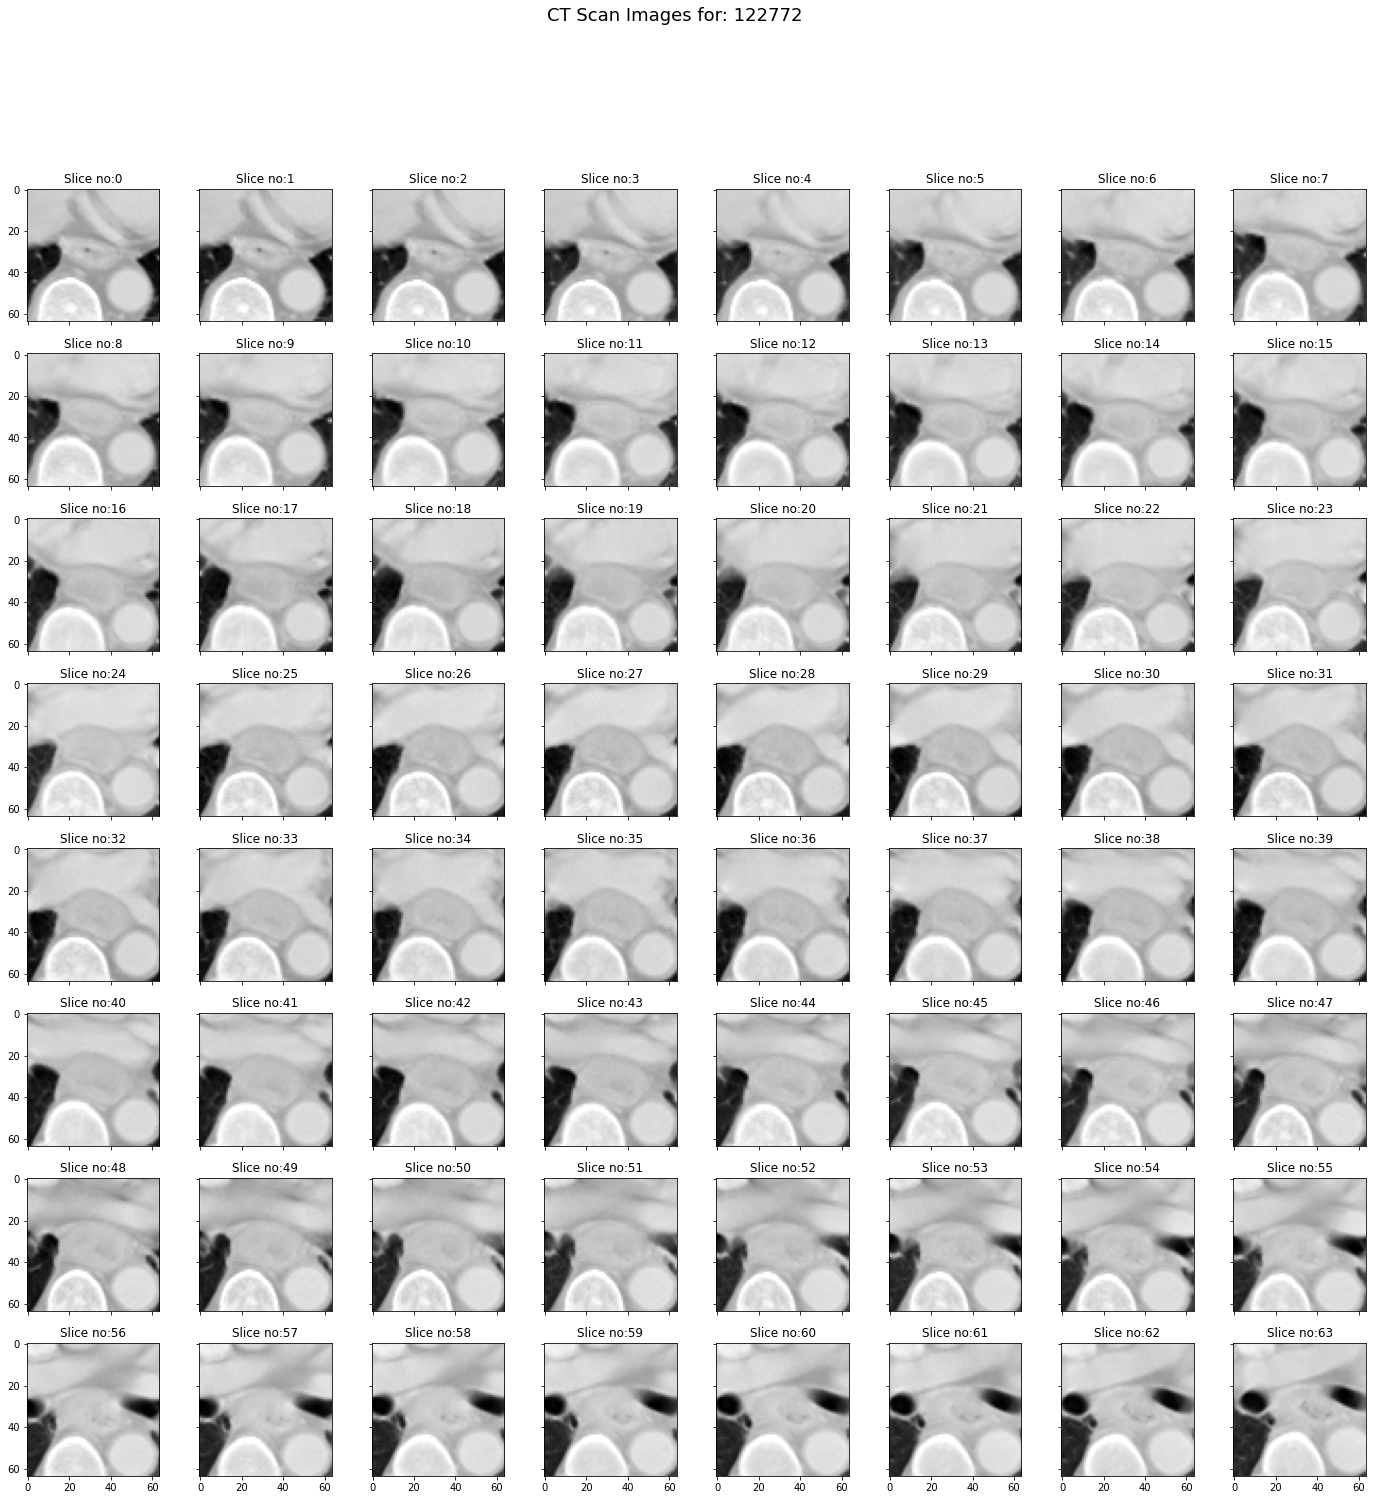

In [247]:
ID = IDs[0]
utilities.check_numpy_images(ID,img_path='../imagedata/Eso_Numpy_ZeroCent64x64x64_211/',rotate=False)

# Issues with Scans

- Oral Contrast - 129143, 153203, 257025, 213738, 198750, 132300
- Oral Contrast - 146062, 150224, 231203, 213936, 199083, 199037, 184249,
- Problem Scan  - 205047